### **Задание 1:** Считайте датасет из файла train.csv (это данные о выживаемости на Титанике) - 1 балл



In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [25]:
df = pd.read_csv('train.csv')

### **Задание 2:** Визуализируйте распределение значений признаков Survived, Pclass, Age, Sex. Parch - 2 балла


#### Переменная 'Survived'

<ipython-input-108-b87ba63db122>:3: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0, '549'), Text(0, 0, '342')]

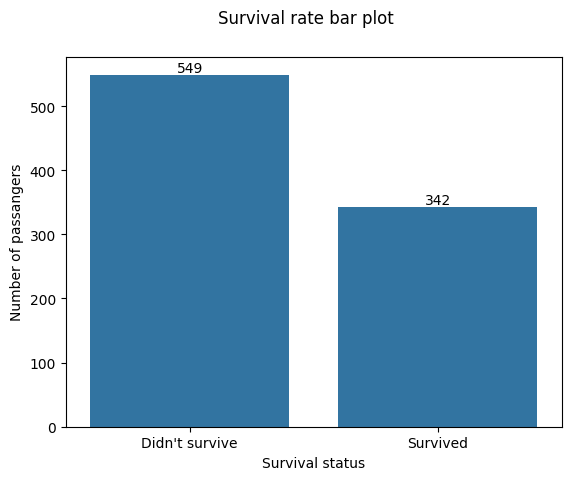

In [108]:
descending_order = df["Survived"].value_counts().sort_values(ascending=False).index
survived_plot = sns.countplot(df, x="Survived", order=descending_order)
survived_plot.set_xticklabels(["Didn't survive","Survived"])
survived_plot.set_xlabel("Survival status")
survived_plot.set_ylabel("Number of passangers")
plt.suptitle("Survival rate bar plot")

# add count labels
surv_count = df['Survived'].value_counts(ascending=False).values
survived_plot.bar_label(container=survived_plot.containers[0], labels=surv_count)

#### Переменная 'Pclass'

<ipython-input-109-e48d3a7a32eb>:3: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0, '491'), Text(0, 0, '216'), Text(0, 0, '184')]

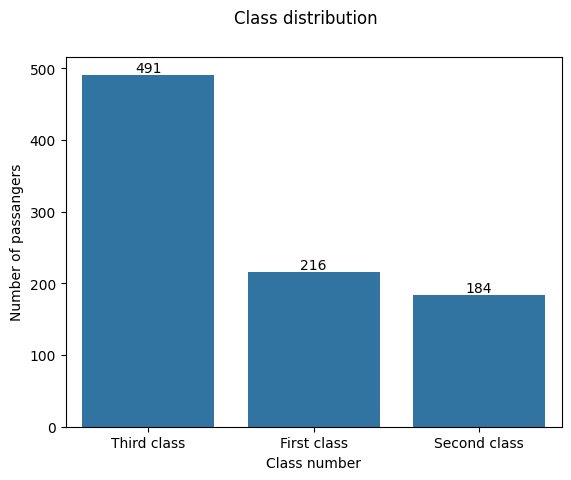

In [109]:
descending_order = df["Pclass"].value_counts().sort_values(ascending=False).index
pclass_plot = sns.countplot(df, x="Pclass", order=descending_order)
pclass_plot.set_xticklabels(["Third class","First class","Second class"])
pclass_plot.set_xlabel("Class number")
pclass_plot.set_ylabel("Number of passangers")
plt.suptitle("Class distribution")

# add count labels
Pclass_count = df['Pclass'].value_counts(ascending=False).values
pclass_plot.bar_label(container=pclass_plot.containers[0], labels=Pclass_count)

#### Переменная 'Age'

Text(0.5, 0.98, 'Age distribution')

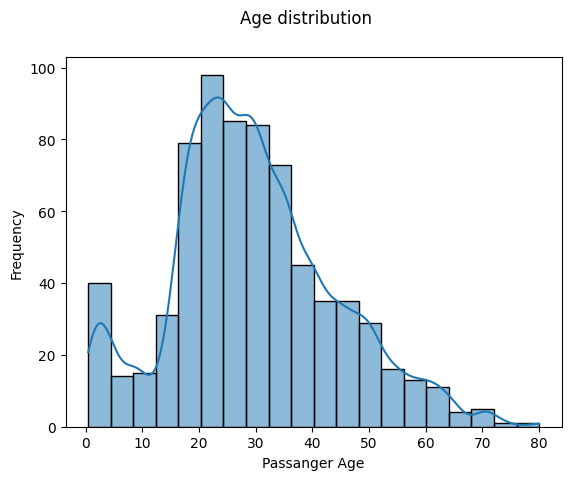

In [110]:
age_plot = sns.histplot(df, x="Age", kde=True, kde_kws={'bw_adjust': 0.5})
age_plot.set_ylabel("Frequency")
age_plot.set_xlabel("Passanger Age")
plt.suptitle("Age distribution")

#### Переменная 'Sex'

<ipython-input-111-1b12d022a86d>:3: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0, '577'), Text(0, 0, '314')]

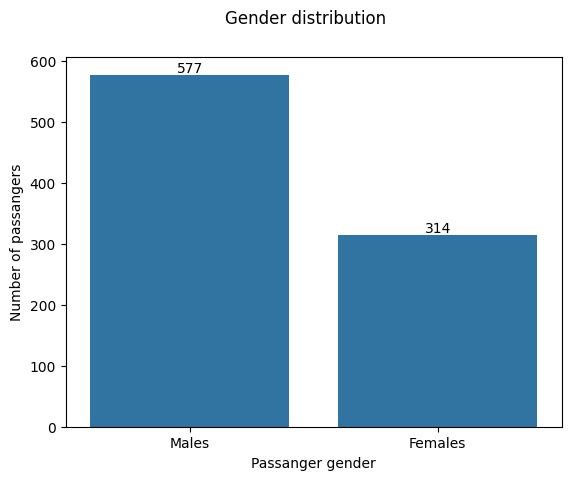

In [111]:
descending_order = df["Sex"].value_counts().sort_values(ascending=False).index
sex_plot = sns.countplot(df, x="Sex", order=descending_order)
sex_plot.set_xticklabels(["Males","Females"])
sex_plot.set_xlabel("Passanger gender")
sex_plot.set_ylabel("Number of passangers")
plt.suptitle("Gender distribution")

# add count labels
sex_count = df['Sex'].value_counts(ascending=False).values
sex_plot.bar_label(container=sex_plot.containers[0], labels=sex_count)

#### Переменная 'Parch

Text(0.5, 0.98, 'Parch distribution')

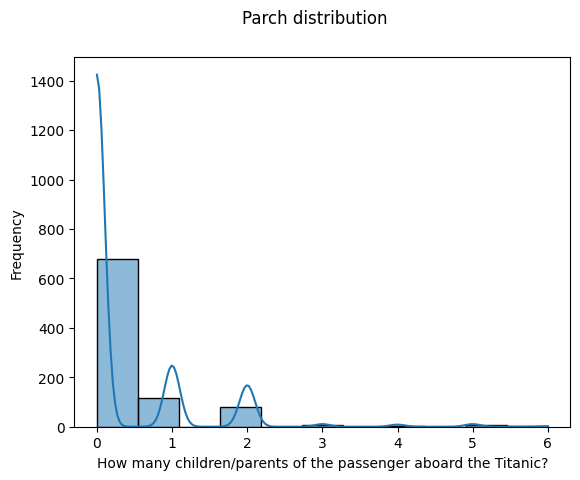

In [112]:
parch_plot = sns.histplot(df, x="Parch", kde=True, kde_kws={'bw_adjust': 0.5})
parch_plot.set_ylabel("Frequency")
parch_plot.set_xlabel("How many children/parents of the passenger aboard the Titanic?")
plt.suptitle("Parch distribution")

### **Задание 3:** Постройте график типа boxplot для столбца Age - 1 балл


Text(0.5, 0.98, 'Age boxplot')

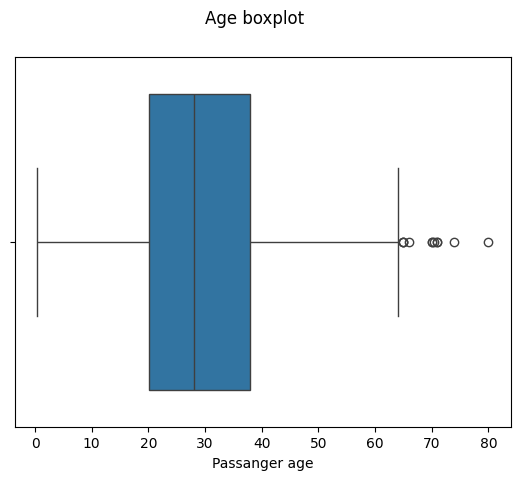

In [107]:
age_box = sns.boxplot(df,x="Age")
age_box.set_xlabel("Passanger age")
plt.suptitle("Age boxplot")

### **Задание 4:** Проинтепретируйте полученный график - 1 балл

* медианный возраст пассажиров: примерно 28 лет
* нижний квартиль - 25% пассажиров имеют возраст ниже 20 лет
* верхний кввартиль - 25% пассажиров имеют возраст больше 38 лет
* минимальный возраст примерно 1 год
* максимальный примерно 80 лет
* имеется несколько выбросов: пассажиры, которые намного старше, чем другие пассажиры в выборке, все пассажиры, которым примерно больше 63 лет это выбросы



### **Задание 5:** Постройте график типа pie chart для переменных Survived, Pclass, подпишите доли в процентах - 1 балл

#### Переменная 'Survived'

Text(0.5, 0.98, "Survived/Didnt't survive pie chart")

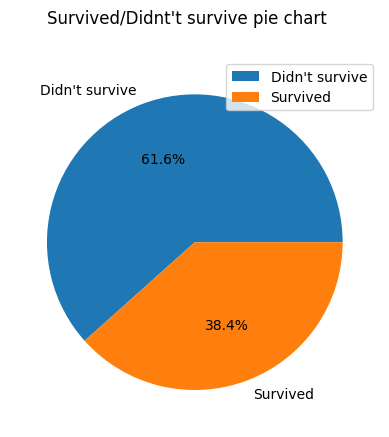

In [106]:
survived_pie = df.Survived.value_counts().plot(kind="pie", autopct="%1.1f%%", labels = ["Didn't survive","Survived"])
survived_pie.legend(loc="upper right")
plt.ylabel('')
plt.suptitle("Survived/Didnt't survive pie chart")

#### Переменная 'Pclass'

Text(0.5, 0.98, 'Passanger class pie chart')

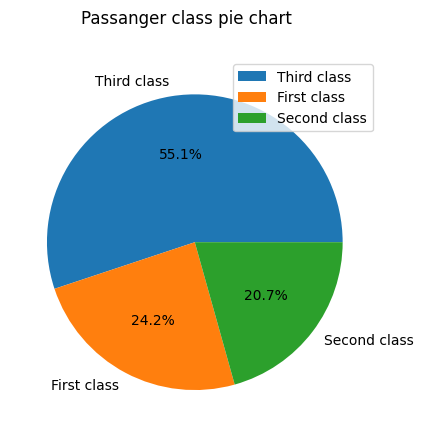

In [105]:
pclass_pie = df.Pclass.value_counts().plot(kind="pie", autopct="%1.1f%%", labels = ["Third class","First class", "Second class"])
pclass_pie.legend(loc="upper right")
plt.ylabel('')
plt.suptitle("Passanger class pie chart")

### **Задание 5:** Постройте график типа pairplot для всех числовых переменных датасета - 1 балл

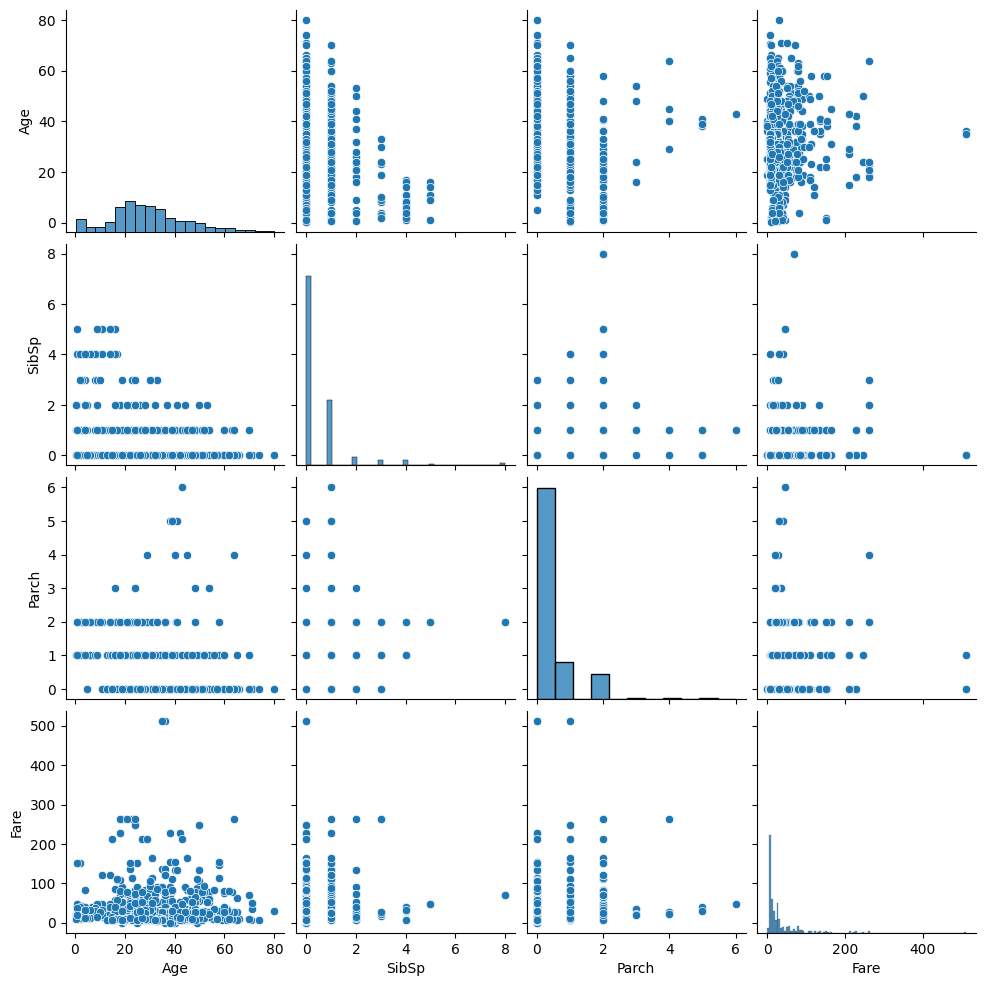

In [74]:
sns.pairplot(df, vars=['Age', 'SibSp', 'Parch', 'Fare'])

### **Задание 6:** Постройте интерактивный sunburst plot (визуализация иерархических данных) с помощью plotly. На первом уровне иерархии - количество пассажиров в каждом из классов, а на втором количество женщин/мужчин в этом классе - 2 балла

In [89]:
df["Pclass"] = df["Pclass"].replace([1,2,3], ["First class", "Second Class", "Third class"])
df["Sex"] = df["Sex"].replace(['female', 'male'], ["Females", "Males"])

fig = px.sunburst(df, path=['Pclass', 'Sex'],title= "Females and males in different classes")
fig.update_traces(
    textinfo="label+percent parent",
    insidetextorientation='horizontal')
fig.show()